In [175]:
# Install and load a few useful packages
# corrplot:    for making a pretty heatmap of the sample correlation matrix
# psych:       for the `fa` and `vss` helper functions
# GPArotation: for the oblimin rotation functionality

installed <- installed.packages()
if (!"corrplot" %in% installed) {install.packages("corrplot")}
if (!"psych" %in% installed) {install.packages("psych")}
if (!"GPArotation" %in% installed) {install.packages("GPArotation")}

library("corrplot")
library("psych")
library("GPArotation")

# seed the rng for reproducibility
set.seed(94608)

# Exploratory Factor Analysis in R

In this notebook we analyze some real personality data collected by Bertram Malle, and shamelessly taken from Stanford's excellent [Psych253 data repository](https://web.stanford.edu/class/psych253/data/). The data consists of participants’ self-ratings on 32 personality traits. 

In this noteobok, it is our goal to re-express the covariation between the different dimensions in the personality dataset in terms of a smaller number of latent dimensions. Further, we will work under the hypothesis that it is the variation in this set of latent factors which, in conjunction with some random noise, generates the observed data.

<div class="alert alert-block alert-warning">
**N.B.** This notebook assumes you are familiar with the general factor analysis model. To review its derivation and assumptions, see its exposition in the accompanying [FA theory notebook](./Factor Analysis Theory.ipynb).
</div>


In [176]:
# download the Stanford personality dataset
d = read.table("https://www.stanford.edu/class/psych253/data/personality0.txt")
head(d)

distant,talkatv,carelss,hardwrk,anxious,agreebl,tense,kind,opposng,relaxed,⋯,lazy,coopera,quiet,organiz,criticl,lax,laidbck,withdrw,givinup,easygon
2,7,1,4,7,8,5,9,5,6,⋯,7,9,9,5,5,5,7,5,5,8
3,8,2,7,5,8,4,8,5,7,⋯,2,7,6,6,4,3,7,2,2,7
6,6,2,5,1,8,2,9,2,8,⋯,5,8,7,4,5,5,7,6,2,8
3,7,6,7,8,8,2,8,3,7,⋯,3,8,4,7,6,6,6,4,3,7
7,3,3,5,8,6,7,2,3,3,⋯,6,6,7,5,5,3,3,7,5,5
7,6,7,6,7,8,7,8,5,5,⋯,5,7,8,6,6,4,4,6,4,7


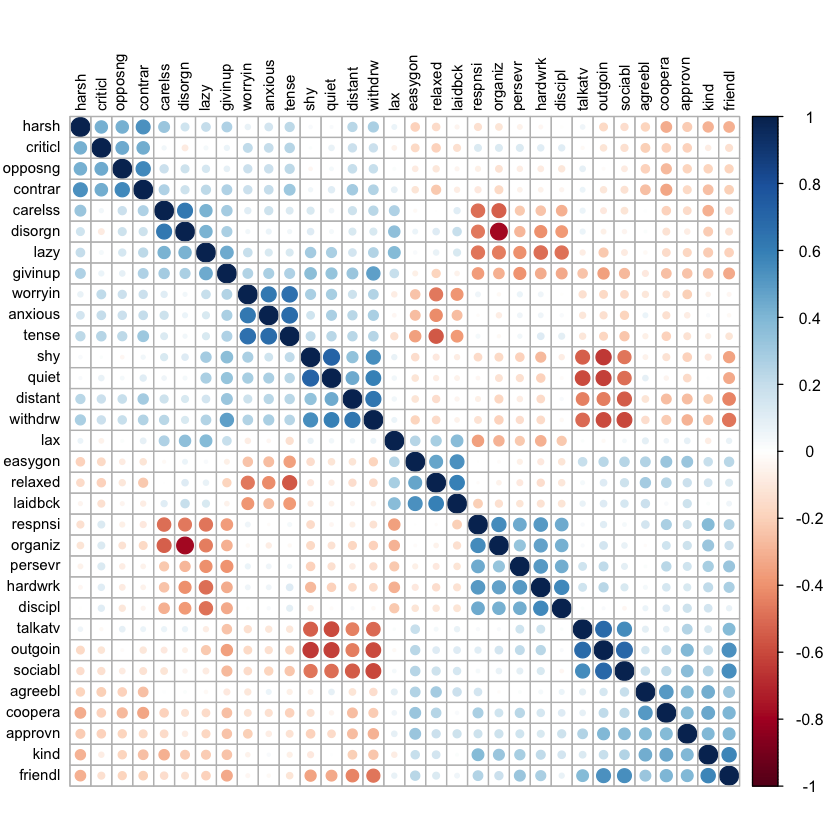

In [177]:
# plot correlations between dimensions
corrplot(cor(d), order = "hclust", tl.col='black', tl.cex=.75)

In [178]:
# standardize the data by subtracting column means (centering) 
# and dividing by the standard deviation (scaling)
d_stan = as.data.frame(scale(d))

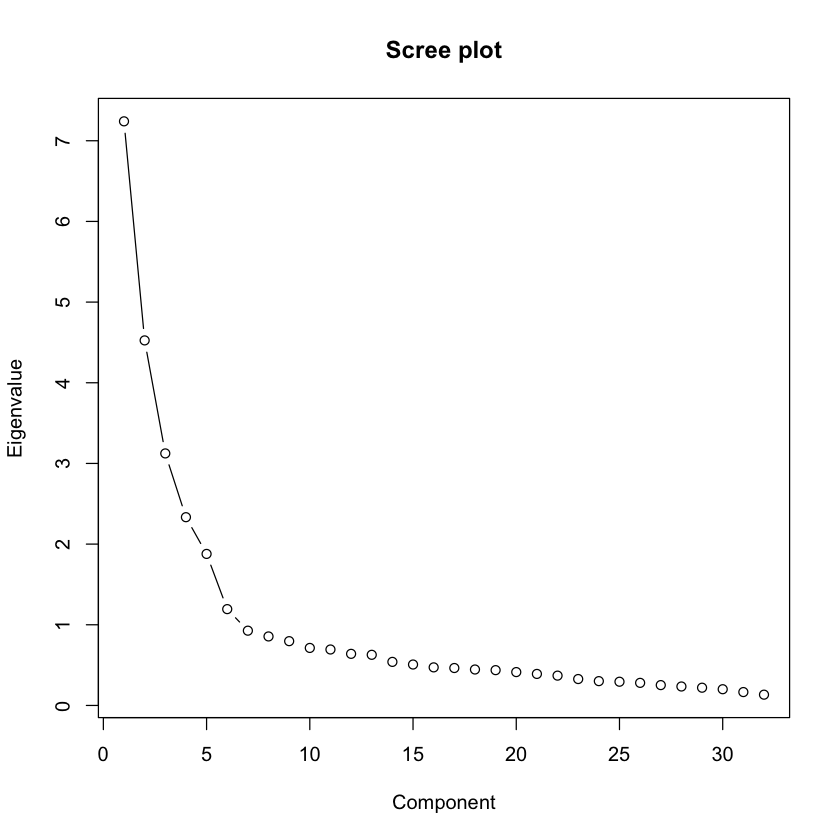

In [179]:
# A scree plot for deciding how many factors to use
R = cor(d_stan) # sample correlation matrix
evs = eigen(R)$values # compute eigenvalues
plot(evs, type='b', xlab='Component', ylab='Eigenvalue', main="Scree plot")

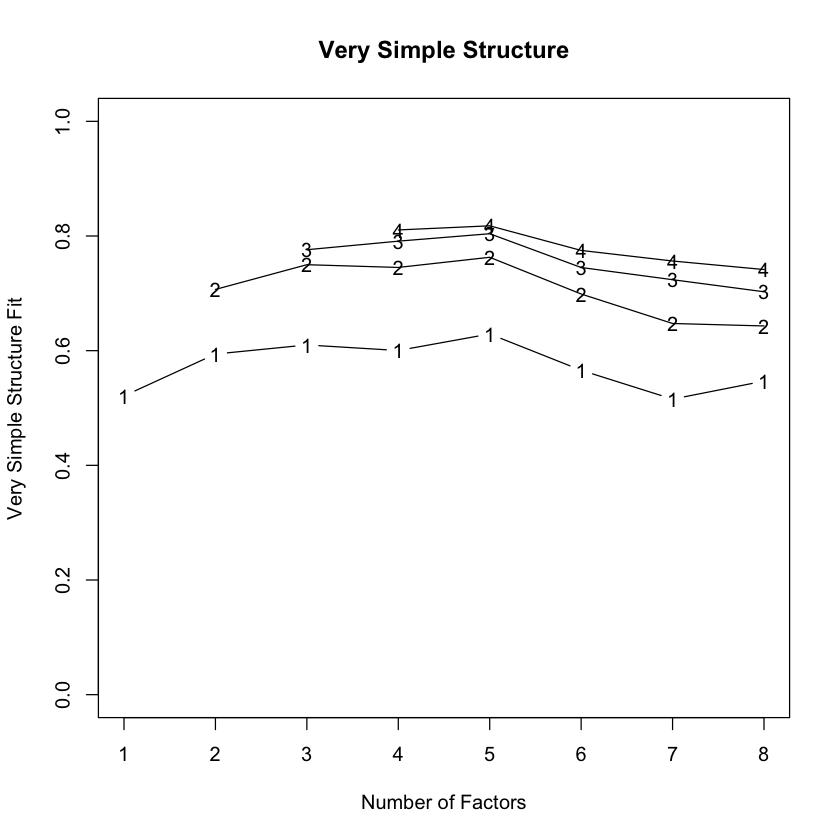

In [180]:
# perform a VSS analysis to decide the number of factors to use 

# note the diagonal=FALSE argument; this is because we are concerned with factors 
# which account for the maximum COvariance in the data. Play around with different 
# rotations here
vss = VSS(d_stan, n=8, rotate="oblimin", diagonal=FALSE)

In [181]:
# Compute the unrotated factor loadings using 10 factors
res1b = fa(d_stan, nfactors=5, rotate="none")
# res1b$loadings

In [183]:
# Compute the proportion of overall covariance accounted for by first factor
evs[1] / 32

[1] 0.2262721

In [184]:
res1b$uniquenesses

distant   talkatv   carelss   hardwrk   anxious   agreebl     tense      kind 
0.5406126 0.3750320 0.5516105 0.5032719 0.4061686 0.5573796 0.3040124 0.4859577 
  opposng   relaxed   disorgn   outgoin   approvn       shy   discipl     harsh 
0.5656206 0.3822075 0.4519231 0.2608148 0.6285792 0.4163379 0.5834750 0.5166693 
  persevr   friendl   worryin   respnsi   contrar   sociabl      lazy   coopera 
0.6231705 0.3956194 0.4124219 0.4102174 0.4157927 0.4039526 0.4860749 0.5444648 
    quiet   organiz   criticl       lax   laidbck   withdrw   givinup   easygon 
0.2975632 0.4170852 0.6002833 0.6676536 0.5001986 0.3420546 0.5830236 0.5831754

In [185]:
# Calculate uniqueness by hand
loadings_distant = res1b$loadings[1,]
communality_distant = sum(loadings_distant^2)
communality_distant

[1] 0.4593874

In [186]:
uniqueness_distant = 1 - communality_distant
uniqueness_distant

[1] 0.5406126

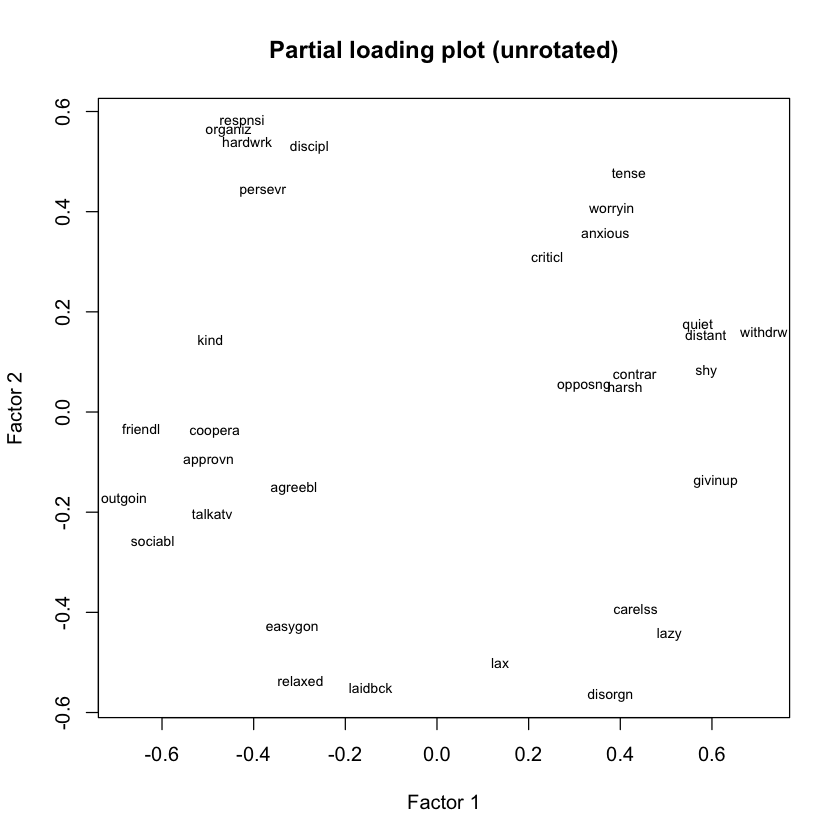

In [187]:
# Plot unrotated loadings for factors 1 and 2
load = res1b$loadings[, 1:2]
plot(load, type="n", xlab="Factor 1", ylab="Factor 2", main="Partial loading plot (unrotated)") # set up plot 
text(load, labels=names(d_stan), cex=.7)

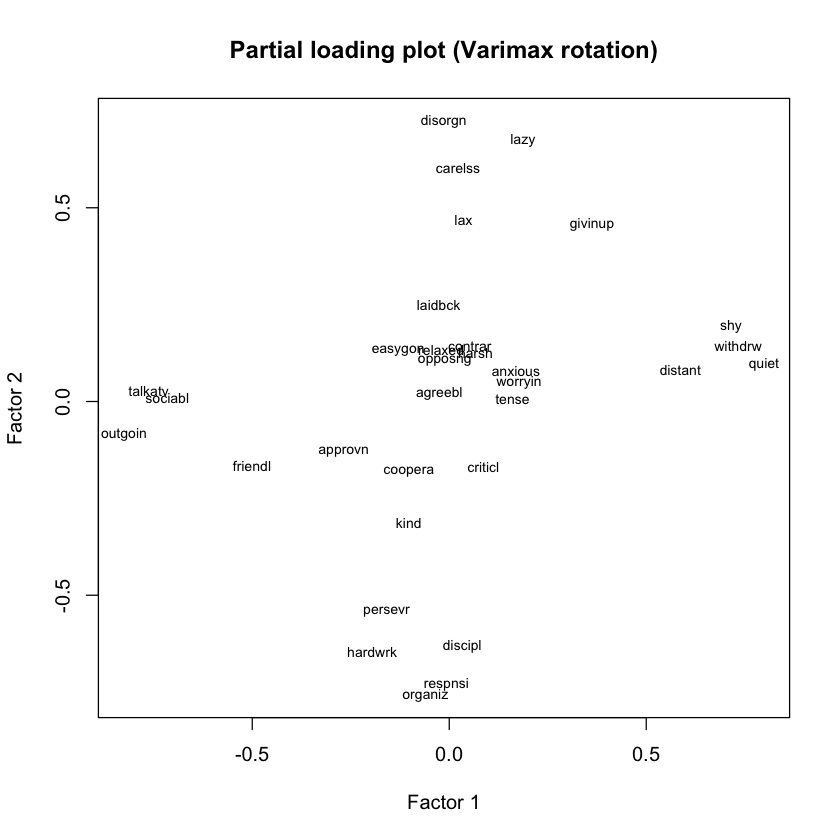

In [188]:
# Plot varimax-rotated loadings for factors 1 and 2
res1a = fa(d_stan, nfactors=5, rotate="varimax")
load = res1a$loadings[, 1:2]
plot(load, type="n", xlab="Factor 1", ylab="Factor 2", main="Partial loading plot (Varimax rotation)") # set up plot 
text(load, labels=names(d_stan), cex=.7) # add variable names

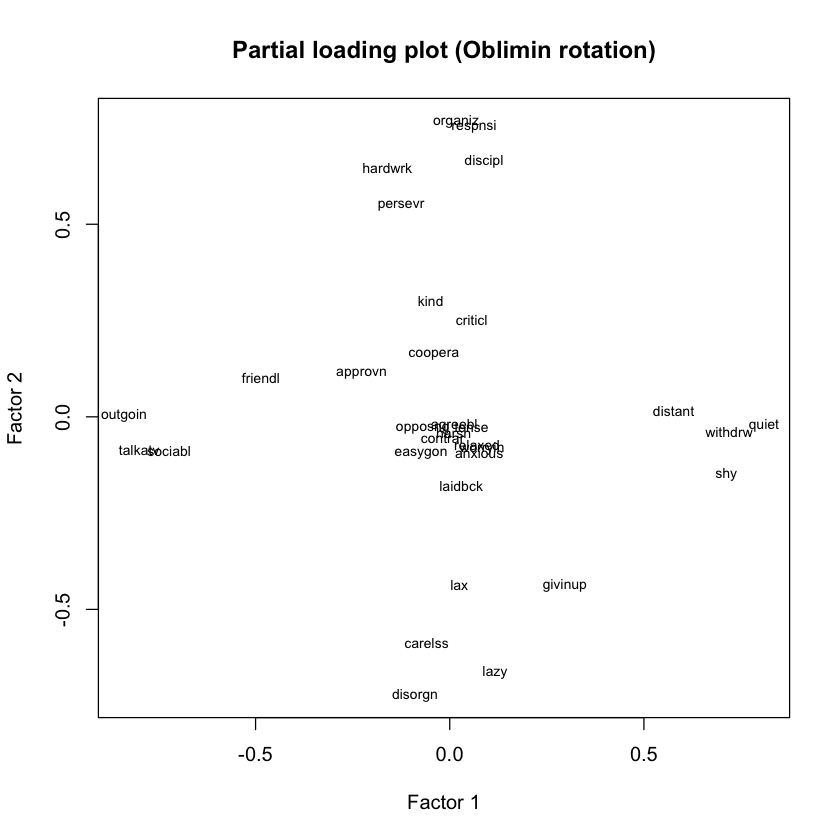

In [189]:
# Perform oblimin (oblique) rotation
res1c = fa(d_stan, nfactors=5, rotate="oblimin")
load = res1c$loadings[, 1:2]
plot(load, type="n", xlab="Factor 1", ylab="Factor 2", main="Partial loading plot (Oblimin rotation)") # set up plot 
text(load, labels=names(d_stan), cex=.7) # add variable names